In [1]:
#This code block imports all the python libraries and modules I will need for this project

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer= PorterStemmer()
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')



import numpy as np
import pandas as pd
import seaborn as sns
import random
import re
import scipy.signal
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jmm36\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jmm36\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#Opening "Masque of the Red Death" by Edgar Allan Poe

with open("Masque.txt", "r", encoding = "utf8") as masque_text:
    masque_full = masque_text.read()

In [3]:
#Opening "Cask of Amontillado" by Edgar Allan Poe

with open("Amontillado.txt", "r", encoding = "utf8") as amontillado_text:
    amontillado_full = amontillado_text.read()

In [4]:
#Opening "A Tell-Tale Heart" by Edgar Allan Poe

with open("TellTale.txt", "r", encoding = "utf8") as telltale_text:
    telltale_full = telltale_text.read()

In [5]:
#Double checking that each text file opened is presenting as a string variable
#Also showing what sting.punctuation is representing (found in the string module imported above)

print(type(masque_full))
print(type(amontillado_full))
print(type(telltale_full))
print(string.punctuation)

<class 'str'>
<class 'str'>
<class 'str'>
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
#In this block, I lowercased all words, split them by spaces, and removed punctuation for Masque.txt

masque_lower = masque_full.lower()
masque_words= masque_lower.split()
table=str.maketrans("", "", string.punctuation)
masque_stripped = [w.translate(table) for w in masque_words]
print(masque_stripped)

['the', 'masque', 'of', 'the', 'red', 'death', 'the', '“red', 'death”', 'had', 'long', 'devastated', 'the', 'country', 'no', 'pestilence', 'had', 'ever', 'been', 'so', 'fatal', 'or', 'so', 'hideous', 'blood', 'was', 'its', 'avatar', 'and', 'its', 'seal—the', 'redness', 'and', 'the', 'horror', 'of', 'blood', 'there', 'were', 'sharp', 'pains', 'and', 'sudden', 'dizziness', 'and', 'then', 'profuse', 'bleeding', 'at', 'the', 'pores', 'with', 'dissolution', 'the', 'scarlet', 'stains', 'upon', 'the', 'body', 'and', 'especially', 'upon', 'the', 'face', 'of', 'the', 'victim', 'were', 'the', 'pest', 'ban', 'which', 'shut', 'him', 'out', 'from', 'the', 'aid', 'and', 'from', 'the', 'sympathy', 'of', 'his', 'fellowmen', 'and', 'the', 'whole', 'seizure', 'progress', 'and', 'termination', 'of', 'the', 'disease', 'were', 'the', 'incidents', 'of', 'half', 'an', 'hour', 'but', 'the', 'prince', 'prospero', 'was', 'happy', 'and', 'dauntless', 'and', 'sagacious', 'when', 'his', 'dominions', 'were', 'half'

In [7]:
#With this block, I now have masque_stripped with each individual word separated and with the story together. 

masque_assembled = " ".join(masque_stripped)
print(masque_assembled)

the masque of the red death the “red death” had long devastated the country no pestilence had ever been so fatal or so hideous blood was its avatar and its seal—the redness and the horror of blood there were sharp pains and sudden dizziness and then profuse bleeding at the pores with dissolution the scarlet stains upon the body and especially upon the face of the victim were the pest ban which shut him out from the aid and from the sympathy of his fellowmen and the whole seizure progress and termination of the disease were the incidents of half an hour but the prince prospero was happy and dauntless and sagacious when his dominions were half depopulated he summoned to his presence a thousand hale and lighthearted friends from among the knights and dames of his court and with these retired to the deep seclusion of one of his castellated abbeys this was an extensive and magnificent structure the creation of the prince’s own eccentric yet august taste a strong and lofty wall girdled it in

In [8]:
#repeating block 6 with Amontillado text

amontillado_lower = amontillado_full.lower()
amontillado_words= amontillado_lower.split()
table=str.maketrans("", "", string.punctuation)
amontillado_stripped = [w.translate(table) for w in amontillado_words]
print(amontillado_stripped)

['the', 'cask', 'of', 'amontillado', 'the', 'thousand', 'injuries', 'of', 'fortunato', 'i', 'had', 'borne', 'as', 'i', 'best', 'could', 'but', 'when', 'he', 'ventured', 'upon', 'insult', 'i', 'vowed', 'revenge', 'you', 'who', 'so', 'well', 'know', 'the', 'nature', 'of', 'my', 'soul', 'will', 'not', 'suppose', 'however', 'that', 'i', 'gave', 'utterance', 'to', 'a', 'threat', 'at', 'length', 'i', 'would', 'be', 'avenged', 'this', 'was', 'a', 'point', 'definitively', 'settled—but', 'the', 'very', 'definitiveness', 'with', 'which', 'it', 'was', 'resolved', 'precluded', 'the', 'idea', 'of', 'risk', 'i', 'must', 'not', 'only', 'punish', 'but', 'punish', 'with', 'impunity', 'a', 'wrong', 'is', 'unredressed', 'when', 'retribution', 'overtakes', 'its', 'redresser', 'it', 'is', 'equally', 'unredressed', 'when', 'the', 'avenger', 'fails', 'to', 'make', 'himself', 'felt', 'as', 'such', 'to', 'him', 'who', 'has', 'done', 'the', 'wrong', 'it', 'must', 'be', 'understood', 'that', 'neither', 'by', 'wo

In [9]:
#repeating block 7 with Amontillado text

amontillado_assembled = " ".join(amontillado_stripped)
print(amontillado_assembled)

the cask of amontillado the thousand injuries of fortunato i had borne as i best could but when he ventured upon insult i vowed revenge you who so well know the nature of my soul will not suppose however that i gave utterance to a threat at length i would be avenged this was a point definitively settled—but the very definitiveness with which it was resolved precluded the idea of risk i must not only punish but punish with impunity a wrong is unredressed when retribution overtakes its redresser it is equally unredressed when the avenger fails to make himself felt as such to him who has done the wrong it must be understood that neither by word nor deed had i given fortunato cause to doubt my good will i continued as was my wont to smile in his face and he did not perceive that my smile now was at the thought of his immolation he had a weak point—this fortunato—although in other regards he was a man to be respected and even feared he prided himself on his connoisseurship in wine few itali

In [10]:
#Repeating block 6 with TellTale text

telltale_lower = telltale_full.lower()
telltale_words= telltale_lower.split()
table=str.maketrans("", "", string.punctuation)
telltale_stripped = [w.translate(table) for w in telltale_words]
print(telltale_stripped)

['the', 'telltale', 'heart', 'true—nervous—very', 'very', 'dreadfully', 'nervous', 'i', 'had', 'been', 'and', 'am', 'but', 'why', 'will', 'you', 'say', 'that', 'i', 'am', 'mad', 'the', 'disease', 'had', 'sharpened', 'my', 'senses—not', 'destroyed—not', 'dulled', 'them', 'above', 'all', 'was', 'the', 'sense', 'of', 'hearing', 'acute', 'i', 'heard', 'all', 'things', 'in', 'the', 'heaven', 'and', 'in', 'the', 'earth', 'i', 'heard', 'many', 'things', 'in', 'hell', 'how', 'then', 'am', 'i', 'mad', 'hearken', 'and', 'observe', 'how', 'healthily—how', 'calmly', 'i', 'can', 'tell', 'you', 'the', 'whole', 'story', 'it', 'is', 'impossible', 'to', 'say', 'how', 'first', 'the', 'idea', 'entered', 'my', 'brain', 'but', 'once', 'conceived', 'it', 'haunted', 'me', 'day', 'and', 'night', 'object', 'there', 'was', 'none', 'passion', 'there', 'was', 'none', 'i', 'loved', 'the', 'old', 'man', 'he', 'had', 'never', 'wronged', 'me', 'he', 'had', 'never', 'given', 'me', 'insult', 'for', 'his', 'gold', 'i', 

In [11]:
#Repeating block 7 with TellTale Text

telltale_assembled = " ".join(telltale_stripped)
print(telltale_assembled)

the telltale heart true—nervous—very very dreadfully nervous i had been and am but why will you say that i am mad the disease had sharpened my senses—not destroyed—not dulled them above all was the sense of hearing acute i heard all things in the heaven and in the earth i heard many things in hell how then am i mad hearken and observe how healthily—how calmly i can tell you the whole story it is impossible to say how first the idea entered my brain but once conceived it haunted me day and night object there was none passion there was none i loved the old man he had never wronged me he had never given me insult for his gold i had no desire i think it was his eye yes it was this he had the eye of a vulture—a pale blue eye with a film over it whenever it fell upon me my blood ran cold and so by degrees—very gradually—i made up my mind to take the life of the old man and thus rid myself of the eye forever now this is the point you fancy me mad madmen know nothing but you should have seen m

In [12]:
#Getting rid of stopwords


filtered_masque = [word for word in masque_stripped if word not in stopwords.words('english')]
print(filtered_masque)

['masque', 'red', 'death', '“red', 'death”', 'long', 'devastated', 'country', 'pestilence', 'ever', 'fatal', 'hideous', 'blood', 'avatar', 'seal—the', 'redness', 'horror', 'blood', 'sharp', 'pains', 'sudden', 'dizziness', 'profuse', 'bleeding', 'pores', 'dissolution', 'scarlet', 'stains', 'upon', 'body', 'especially', 'upon', 'face', 'victim', 'pest', 'ban', 'shut', 'aid', 'sympathy', 'fellowmen', 'whole', 'seizure', 'progress', 'termination', 'disease', 'incidents', 'half', 'hour', 'prince', 'prospero', 'happy', 'dauntless', 'sagacious', 'dominions', 'half', 'depopulated', 'summoned', 'presence', 'thousand', 'hale', 'lighthearted', 'friends', 'among', 'knights', 'dames', 'court', 'retired', 'deep', 'seclusion', 'one', 'castellated', 'abbeys', 'extensive', 'magnificent', 'structure', 'creation', 'prince’s', 'eccentric', 'yet', 'august', 'taste', 'strong', 'lofty', 'wall', 'girdled', 'wall', 'gates', 'iron', 'courtiers', 'entered', 'brought', 'furnaces', 'massy', 'hammers', 'welded', 'b

In [13]:
#Getting rid of Stopwords

filtered_amontillado = [word for word in amontillado_stripped if word not in stopwords.words('english')]
print(filtered_amontillado)

['cask', 'amontillado', 'thousand', 'injuries', 'fortunato', 'borne', 'best', 'could', 'ventured', 'upon', 'insult', 'vowed', 'revenge', 'well', 'know', 'nature', 'soul', 'suppose', 'however', 'gave', 'utterance', 'threat', 'length', 'would', 'avenged', 'point', 'definitively', 'settled—but', 'definitiveness', 'resolved', 'precluded', 'idea', 'risk', 'must', 'punish', 'punish', 'impunity', 'wrong', 'unredressed', 'retribution', 'overtakes', 'redresser', 'equally', 'unredressed', 'avenger', 'fails', 'make', 'felt', 'done', 'wrong', 'must', 'understood', 'neither', 'word', 'deed', 'given', 'fortunato', 'cause', 'doubt', 'good', 'continued', 'wont', 'smile', 'face', 'perceive', 'smile', 'thought', 'immolation', 'weak', 'point—this', 'fortunato—although', 'regards', 'man', 'respected', 'even', 'feared', 'prided', 'connoisseurship', 'wine', 'italians', 'true', 'virtuoso', 'spirit', 'part', 'enthusiasm', 'adopted', 'suit', 'time', 'opportunity—to', 'practise', 'imposture', 'upon', 'british',

In [14]:
#Getting rid of Stopwords

filtered_telltale = [word for word in telltale_stripped if word not in stopwords.words('english')]
print(filtered_telltale)

['telltale', 'heart', 'true—nervous—very', 'dreadfully', 'nervous', 'say', 'mad', 'disease', 'sharpened', 'senses—not', 'destroyed—not', 'dulled', 'sense', 'hearing', 'acute', 'heard', 'things', 'heaven', 'earth', 'heard', 'many', 'things', 'hell', 'mad', 'hearken', 'observe', 'healthily—how', 'calmly', 'tell', 'whole', 'story', 'impossible', 'say', 'first', 'idea', 'entered', 'brain', 'conceived', 'haunted', 'day', 'night', 'object', 'none', 'passion', 'none', 'loved', 'old', 'man', 'never', 'wronged', 'never', 'given', 'insult', 'gold', 'desire', 'think', 'eye', 'yes', 'eye', 'vulture—a', 'pale', 'blue', 'eye', 'film', 'whenever', 'fell', 'upon', 'blood', 'ran', 'cold', 'degrees—very', 'gradually—i', 'made', 'mind', 'take', 'life', 'old', 'man', 'thus', 'rid', 'eye', 'forever', 'point', 'fancy', 'mad', 'madmen', 'know', 'nothing', 'seen', 'seen', 'wisely', 'proceeded—with', 'caution—with', 'foresight—with', 'dissimulation', 'went', 'work', 'never', 'kinder', 'old', 'man', 'whole', 'w

In [15]:
#Stemmed words

stemmed_masque = [stemmer.stem(word) for word in filtered_masque]
print(stemmed_masque)

['masqu', 'red', 'death', '“red', 'death”', 'long', 'devast', 'countri', 'pestil', 'ever', 'fatal', 'hideou', 'blood', 'avatar', 'seal—th', 'red', 'horror', 'blood', 'sharp', 'pain', 'sudden', 'dizzi', 'profus', 'bleed', 'pore', 'dissolut', 'scarlet', 'stain', 'upon', 'bodi', 'especi', 'upon', 'face', 'victim', 'pest', 'ban', 'shut', 'aid', 'sympathi', 'fellowmen', 'whole', 'seizur', 'progress', 'termin', 'diseas', 'incid', 'half', 'hour', 'princ', 'prospero', 'happi', 'dauntless', 'sagaci', 'dominion', 'half', 'depopul', 'summon', 'presenc', 'thousand', 'hale', 'lightheart', 'friend', 'among', 'knight', 'dame', 'court', 'retir', 'deep', 'seclus', 'one', 'castel', 'abbey', 'extens', 'magnific', 'structur', 'creation', 'prince’', 'eccentr', 'yet', 'august', 'tast', 'strong', 'lofti', 'wall', 'girdl', 'wall', 'gate', 'iron', 'courtier', 'enter', 'brought', 'furnac', 'massi', 'hammer', 'weld', 'bolt', 'resolv', 'leav', 'mean', 'neither', 'ingress', 'egress', 'sudden', 'impuls', 'despair',

In [16]:
#Stemmed words

stemmed_amontillado = [stemmer.stem(word) for word in filtered_amontillado]
print(stemmed_amontillado)

['cask', 'amontillado', 'thousand', 'injuri', 'fortunato', 'born', 'best', 'could', 'ventur', 'upon', 'insult', 'vow', 'reveng', 'well', 'know', 'natur', 'soul', 'suppos', 'howev', 'gave', 'utter', 'threat', 'length', 'would', 'aveng', 'point', 'definit', 'settled—but', 'definit', 'resolv', 'preclud', 'idea', 'risk', 'must', 'punish', 'punish', 'impun', 'wrong', 'unredress', 'retribut', 'overtak', 'redress', 'equal', 'unredress', 'aveng', 'fail', 'make', 'felt', 'done', 'wrong', 'must', 'understood', 'neither', 'word', 'deed', 'given', 'fortunato', 'caus', 'doubt', 'good', 'continu', 'wont', 'smile', 'face', 'perceiv', 'smile', 'thought', 'immol', 'weak', 'point—thi', 'fortunato—although', 'regard', 'man', 'respect', 'even', 'fear', 'pride', 'connoisseurship', 'wine', 'italian', 'true', 'virtuoso', 'spirit', 'part', 'enthusiasm', 'adopt', 'suit', 'time', 'opportunity—to', 'practis', 'impostur', 'upon', 'british', 'austrian', 'millionair', 'paint', 'gemmari', 'fortunato', 'like', 'count

In [17]:
#Stemmed Words

stemmed_telltale = [stemmer.stem(word) for word in filtered_telltale]
print(stemmed_telltale)

['telltal', 'heart', 'true—nervous—veri', 'dread', 'nervou', 'say', 'mad', 'diseas', 'sharpen', 'senses—not', 'destroyed—not', 'dull', 'sens', 'hear', 'acut', 'heard', 'thing', 'heaven', 'earth', 'heard', 'mani', 'thing', 'hell', 'mad', 'hearken', 'observ', 'healthily—how', 'calmli', 'tell', 'whole', 'stori', 'imposs', 'say', 'first', 'idea', 'enter', 'brain', 'conceiv', 'haunt', 'day', 'night', 'object', 'none', 'passion', 'none', 'love', 'old', 'man', 'never', 'wrong', 'never', 'given', 'insult', 'gold', 'desir', 'think', 'eye', 'ye', 'eye', 'vulture—a', 'pale', 'blue', 'eye', 'film', 'whenev', 'fell', 'upon', 'blood', 'ran', 'cold', 'degrees—veri', 'gradually—i', 'made', 'mind', 'take', 'life', 'old', 'man', 'thu', 'rid', 'eye', 'forev', 'point', 'fanci', 'mad', 'madmen', 'know', 'noth', 'seen', 'seen', 'wise', 'proceeded—with', 'caution—with', 'foresight—with', 'dissimul', 'went', 'work', 'never', 'kinder', 'old', 'man', 'whole', 'week', 'kill', 'everi', 'night', 'midnight', 'turn'

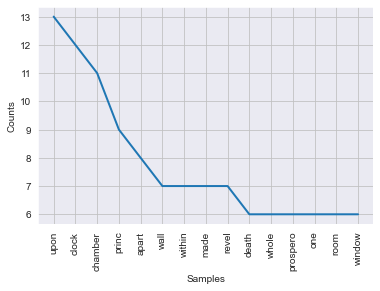

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
#Graphing Most Frequent Words

sns.set_style('darkgrid')
graph_masque= nltk.FreqDist(stemmed_masque)
graph_masque.plot(15)

In [19]:
#Parts of Speech Tagging

pos_masque = nltk.pos_tag(nltk.FreqDist(stemmed_masque))
print(pos_masque)

[('upon', 'IN'), ('clock', 'JJ'), ('chamber', 'NN'), ('princ', 'NNS'), ('apart', 'RB'), ('wall', 'NN'), ('within', 'IN'), ('made', 'VBN'), ('revel', 'NN'), ('death', 'NN'), ('whole', 'JJ'), ('prospero', 'NN'), ('one', 'CD'), ('room', 'NN'), ('window', 'NN'), ('stood', 'VBD'), ('figur', 'JJ'), ('red', 'JJ'), ('suit', 'NN'), ('hand', 'NN'), ('light', 'VBD'), ('seven', 'CD'), ('fro', 'JJ'), ('eboni', 'JJ'), ('music', 'NN'), ('chime', 'NN'), ('horror', 'NN'), ('presenc', 'NN'), ('yet', 'RB'), ('courtier', 'JJR'), ('might', 'MD'), ('mask', 'VB'), ('first', 'JJ'), ('color', 'NN'), ('hue', 'NN'), ('blue', 'JJ'), ('pane', 'NN'), ('black', 'JJ'), ('thu', 'NN'), ('compani', 'NN'), ('sound', 'VBD'), ('echo', 'RB'), ('much', 'JJ'), ('seiz', 'NN'), ('blood', 'NN'), ('sharp', 'JJ'), ('face', 'NN'), ('hour', 'NN'), ('thousand', 'VBP'), ('among', 'IN'), ('deep', 'JJ'), ('magnific', 'NN'), ('prince’', 'NN'), ('tast', 'NN'), ('despair', 'NN'), ('take', 'VB'), ('musician', 'JJ'), ('close', 'JJ'), ('rage'

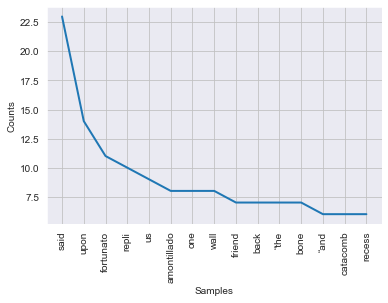

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
#Graphing Most Frequent Words

sns.set_style('darkgrid')
graph_amontillado= nltk.FreqDist(stemmed_amontillado)
graph_amontillado.plot(15)

In [21]:
#Parts of Speech Tagging

pos_amontillado = nltk.pos_tag(nltk.FreqDist(stemmed_amontillado))
print(pos_amontillado)

[('said', 'VBD'), ('upon', 'IN'), ('fortunato', 'NN'), ('repli', 'VBP'), ('us', 'PRP'), ('amontillado', 'VBP'), ('one', 'CD'), ('wall', 'NN'), ('friend', 'NN'), ('back', 'RB'), ('“the', 'NNP'), ('bone', 'NN'), ('“and', 'NNP'), ('catacomb', 'NN'), ('recess', 'NN'), ('must', 'MD'), ('bell', 'VB'), ('pass', 'NN'), ('“i', 'NNP'), ('let', 'NN'), ('go', 'VB'), ('amontillado”', 'JJ'), ('two', 'CD'), ('long', 'RB'), ('ugh', 'IN'), ('last', 'JJ'), ('perceiv', 'JJ'), ('man', 'NN'), ('wine', 'NN'), ('“a', 'NNP'), ('cannot', 'NN'), ('vault', 'NN'), ('damp', 'JJ'), ('arm', 'NN'), ('jingl', 'NN'), ('“it', 'NNP'), ('ugh—ugh', 'IN'), ('grew', 'VBD'), ('“you', 'NNP'), ('still', 'RB'), ('tier', 'RB'), ('well', 'RB'), ('length', 'JJ'), ('make', 'VBP'), ('word', 'NN'), ('good', 'JJ'), ('thought', 'NN'), ('respect', 'NN'), ('time', 'NN'), ('matter', 'NN'), ('“mi', 'NNP'), ('look', 'NN'), ('doubts”', 'NN'), ('imposs', 'NN'), ('“amontillado”', 'NNP'), ('engag', 'VBZ'), ('turn', 'VBP'), ('luchesi—”', 'JJ'), (

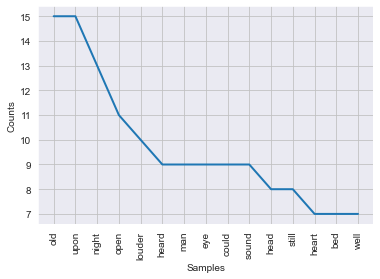

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
#Graphing Most Frequent Words

sns.set_style('darkgrid')
graph_telltale= nltk.FreqDist(stemmed_telltale)
graph_telltale.plot(15)

In [23]:
#Parts of Speech Tagging

pos_telltale = nltk.pos_tag(nltk.FreqDist(stemmed_telltale))
print(pos_telltale)

[('old', 'JJ'), ('upon', 'NN'), ('night', 'NN'), ('open', 'JJ'), ('louder', 'NN'), ('heard', 'NN'), ('man', 'NN'), ('eye', 'NN'), ('could', 'MD'), ('sound', 'VB'), ('head', 'NN'), ('still', 'RB'), ('heart', 'NN'), ('bed', 'NN'), ('well', 'RB'), ('knew', 'VBD'), ('nois', 'NNS'), ('say', 'VBP'), ('think', 'VBP'), ('lantern', 'JJ'), ('would', 'MD'), ('steadili', 'VB'), ('grew', 'VBD'), ('increas', 'JJ'), ('mad', 'JJ'), ('noth', 'DT'), ('everi', 'JJ'), ('door', 'NN'), ('see', 'VBP'), ('man’', 'JJ'), ('hour', 'NN'), ('room', 'NN'), ('beat', 'NN'), ('offic', 'JJ'), ('dull', 'JJ'), ('thing', 'NN'), ('mani', 'NN'), ('whole', 'JJ'), ('never', 'RB'), ('made', 'VBN'), ('close', 'JJ'), ('move', 'NN'), ('took', 'VBD'), ('ray', 'NN'), ('minut', 'NN'), ('felt', 'VBD'), ('fear', 'JJ'), ('terror', 'NN'), ('length', 'NN'), ('yet', 'RB'), ('dead', 'JJ'), ('shriek', 'NN'), ('dread', 'NN'), ('hear', 'VBP'), ('first', 'JJ'), ('ye', 'NN'), ('fell', 'VBD'), ('fanci', 'RB'), ('wise', 'JJ'), ('went', 'VBD'), ('

In [24]:
stories_all = stemmed_masque + stemmed_amontillado + stemmed_telltale
print(stories_all)

['masqu', 'red', 'death', '“red', 'death”', 'long', 'devast', 'countri', 'pestil', 'ever', 'fatal', 'hideou', 'blood', 'avatar', 'seal—th', 'red', 'horror', 'blood', 'sharp', 'pain', 'sudden', 'dizzi', 'profus', 'bleed', 'pore', 'dissolut', 'scarlet', 'stain', 'upon', 'bodi', 'especi', 'upon', 'face', 'victim', 'pest', 'ban', 'shut', 'aid', 'sympathi', 'fellowmen', 'whole', 'seizur', 'progress', 'termin', 'diseas', 'incid', 'half', 'hour', 'princ', 'prospero', 'happi', 'dauntless', 'sagaci', 'dominion', 'half', 'depopul', 'summon', 'presenc', 'thousand', 'hale', 'lightheart', 'friend', 'among', 'knight', 'dame', 'court', 'retir', 'deep', 'seclus', 'one', 'castel', 'abbey', 'extens', 'magnific', 'structur', 'creation', 'prince’', 'eccentr', 'yet', 'august', 'tast', 'strong', 'lofti', 'wall', 'girdl', 'wall', 'gate', 'iron', 'courtier', 'enter', 'brought', 'furnac', 'massi', 'hammer', 'weld', 'bolt', 'resolv', 'leav', 'mean', 'neither', 'ingress', 'egress', 'sudden', 'impuls', 'despair',

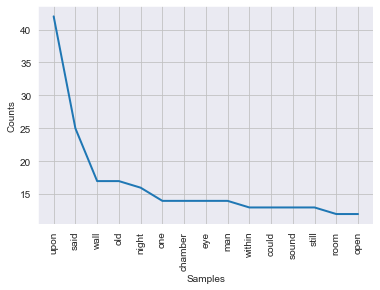

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
#Graphing Most Frequent Words

sns.set_style('darkgrid')
graph_all= nltk.FreqDist(stories_all)
graph_all.plot(15)